In [11]:
import pandas as pd
import datetime as dt
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# %matplotlib inline


In [12]:
file_path = Path("../data/amzn_daily_splits.csv")
amzn_df = pd.read_csv(file_path, index_col='date', parse_dates=True).dropna()

file_path = Path("../data/goog_daily_splits.csv")
goog_df = pd.read_csv(file_path, index_col='date', parse_dates=True).dropna()

file_path = Path("../data/meta_daily_splits.csv")
meta_df = pd.read_csv(file_path, index_col='date', parse_dates=True).dropna()

file_path = Path("../data/nvda_daily_splits.csv")
nvda_df = pd.read_csv(file_path, index_col='date', parse_dates=True).dropna()

file_path = Path("../data/orcl_daily_splits.csv")
orcl_df = pd.read_csv(file_path, index_col='date', parse_dates=True).dropna()

file_path = Path("../data/tsla_daily_splits.csv")
tsla_df = pd.read_csv(file_path, index_col='date', parse_dates=True).dropna()


In [13]:
amzn_df = amzn_df.drop(columns=['open', 'high', 'low', 'volume'])
goog_df = goog_df.drop(columns=['open', 'high', 'low', 'volume'])
meta_df = meta_df.drop(columns=['open', 'high', 'low', 'volume'])
nvda_df = nvda_df.drop(columns=['open', 'high', 'low', 'volume'])
orcl_df = orcl_df.drop(columns=['open', 'high', 'low', 'volume'])
tsla_df = tsla_df.drop(columns=['open', 'high', 'low', 'volume'])

In [14]:
combined_df = pd.concat([amzn_df, goog_df, meta_df, nvda_df, orcl_df, tsla_df],
                        axis="index",
                        join="inner"
                        ).sort_index()

combined_df.head(10)

,close
date,
2019-12-02,89.080000
2019-12-02,64.496000
2019-12-02,22.324667
2019-12-02,55.430000
2019-12-02,199.700000
2019-12-02,5.231250
2019-12-03,88.498000
2019-12-03,64.764000
2019-12-03,22.413333


In [26]:
amzn_df['daily_pct_change'] = amzn_df['close'].pct_change() * 100
goog_df['daily_pct_change'] = goog_df['close'].pct_change() * 100
meta_df['daily_pct_change'] = meta_df['close'].pct_change() * 100
nvda_df['daily_pct_change'] = nvda_df['close'].pct_change() * 100
orcl_df['daily_pct_change'] = orcl_df['close'].pct_change() * 100
tsla_df['daily_pct_change'] = tsla_df['close'].pct_change() * 100

combined_df['daily_pct_change'] = combined_df['close'].pct_change() * 100

combined_df.head(5)

,close,daily_pct_change
date,,
2019-12-02,89.080000,NaN
2019-12-02,64.496000,-27.597665
2019-12-02,22.324667,-65.385967
2019-12-02,55.430000,148.290381
2019-12-02,199.700000,260.274220


<Axes: title={'center': 'AMZN Close Weekly Percent Change'}, xlabel='Day of the Week', ylabel='Daily % Change'>

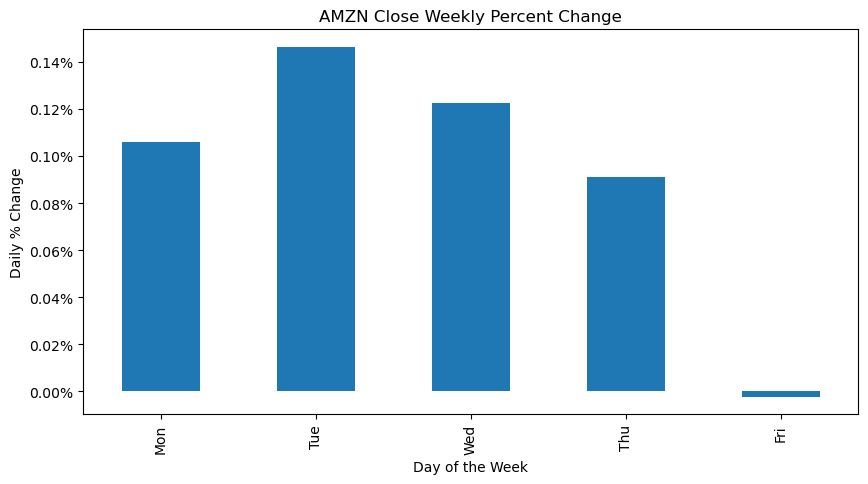

In [33]:
amzn_dw_fig = amzn_df['daily_pct_change'].groupby(amzn_df.index.isocalendar().day).mean().plot(kind='bar', figsize=(10, 5))
amzn_dw_fig.set_title("AMZN Close Weekly Percent Change")
amzn_dw_fig.set_xlabel("Day of the Week")
amzn_dw_fig.set_ylabel("Daily % Change")

tick_locaitons = np.arange(0, 5, 1)
amzn_dw_fig.set_xticks(tick_locaitons, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
amzn_dw_fig.yaxis.set_major_formatter(PercentFormatter(decimals='2'))
amzn_dw_fig
# plt.xticks(tick_locaitons, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.show()